MU4MES03 - Slender Structures - BEAMS - TD4 - $\text{DUVIVIER Valentin}$

##### Libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

##### Data

In [10]:
# Force
g = 9.81
m = 14    * 10**-3
P = g * m

# Geometry
d = 0.6   * 10**-3
R = d / 2

L = 1#16.5  * 10**-2          # Length beam

S = np.pi * R**2
I = np.pi * R**4 / 4

# Material
E = 210 * 10**9

nu = .3
G  = E / (2*(1 + nu))    #[Pa] # Shearing coefficient

N = 78
H = 6 * 10**-3

Aeq =     L * d**4 * G     / (8 * N         * H**3            )
Deq = 4 * L * E    * G * I / (    N * np.pi * H    * (E + 2*G))
Feq = 8 * L * E        * I / (        np.pi * H**3 * N        )

# ------------------------

# Pulsation
n = 1
w = (n - 1/2) * np.pi/L

# ------------------------

s = np.linspace(0, L, 100)

# Displacement
v = (1 - np.cos(w*s))

# Critique force
Pc = (n - 1/2)**2 * (np.pi/L)**2 * Deq
Lc = (n - 1/2) * np.pi * np.sqrt(Deq/P)

# ------------------------

print(Deq, Feq, Aeq)

0.0007901337792642139 201.92307692307688 77.66272189349111


$\underline{\text{I. Unshearable}}$

##### Mode 1

For a critical length (length at which buckling takes place) of 1.00E+00 m we get Pc = 1.95E-03 N
--> For a force (force at which we want to know buckling length) of 1.37E-01 N we get critical length Lc = 1.19E-01 m


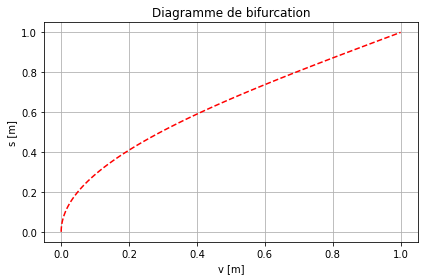

In [11]:
# Displacement

plt.figure()

plt.plot(v, s, 'r--')

plt.title('Diagramme de bifurcation')
plt.xlabel('v [m]')
plt.ylabel('s [m]')

plt.grid(True)

plt.tight_layout()

# -------------------------

print(f'For a critical length (length at which buckling takes place) of {L:.2E} m we get Pc = {Pc:.2E} N')
print(f'--> For a force (force at which we want to know buckling length) of {P:.2E} N we get critical length Lc = {Lc:.2E} m')

#### Iterative diagram

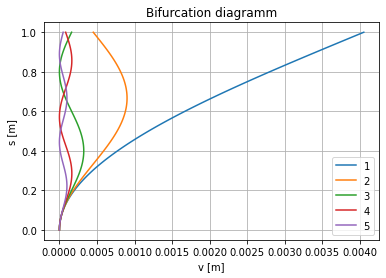

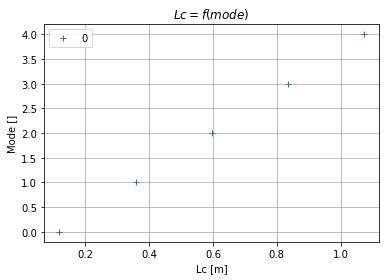

In [16]:
# data mesh & sumation solution
k = 5
l = 100

s = np.linspace(0, L, l)
N = np.array([i for i in range(k)])

v1  = np.zeros((l, k))
Lc1 = np.zeros((k))

# ----------------------------------

C = 1     # Displacement v within a constant

# ----------------------------------

## Displacement
plt.figure()

for n in N:
    w       = (n + 1/2)  * np.pi / L
    v1[:,n] = (C / w**2) * (1 - np.cos(w*s))

plt.plot(v1, s)

plt.title('Bifurcation diagramm')
plt.xlabel('v [m]')
plt.ylabel('s [m]')

plt.legend(N+1)
plt.grid(True)

plt.savefig('eigenmodes.png')

# ----------------------------------

## Critical length
plt.figure()

for n in N:
    Lc1[n]  = (n + 1/2) * np.pi * np.sqrt(Deq/P)

plt.plot(Lc1, N, '+')

plt.title(r'$Lc=f(mode)$')
plt.xlabel('Lc [m]')
plt.ylabel('Mode []')

plt.legend(N)
plt.grid(True)

$\underline{\text{II. Shearable - }o(\theta^2)}$

Iterative diagramm

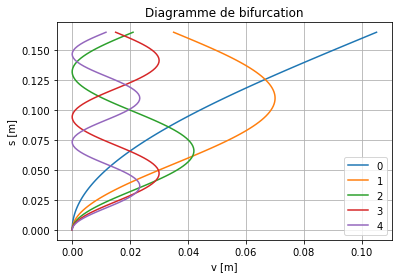

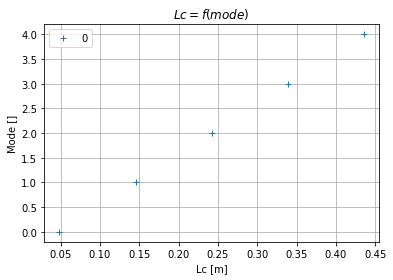

In [5]:
# data mesh & sumation solution
k = 5
l = 100

s = np.linspace(0, L, l)
N = np.array([i for i in range(k)])

v2  = np.zeros((l, k))
Lc2 = np.zeros((k))

# ----------------------------------

C = 1     # Displacement v within a constant

# ----------------------------------

## Displacement
plt.figure()

for n in N:
    w       = (n + 1/2) * np.pi / L
    v2[:,n] = (C / w) * (1 - np.cos(w*s))

plt.plot(v2, s)

plt.title('Diagramme de bifurcation')
plt.xlabel('v [m]')
plt.ylabel('s [m]')

plt.legend(N)
plt.grid(True)

# ----------------------------------

## Critical length
plt.figure()

for n in N:
    Lc2[n]  = (n + 1/2) * np.pi * np.sqrt(Deq/P)

plt.plot(Lc2, N, '+')

plt.title(r'$Lc=f(mode)$')
plt.xlabel('Lc [m]')
plt.ylabel('Mode []')

plt.legend(N)
plt.grid(True)

$\underline{\text{III. Shearable - }o(\theta)}$

Iterative diagramm

--> For a force (force at which we want to know buckling length) of 1.37E-01 N we get critical length Lc = 3.95E-02 m


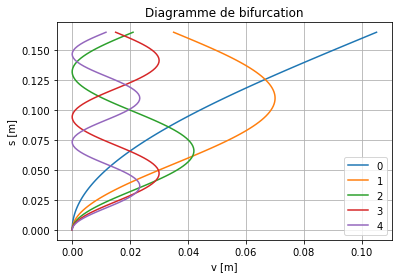

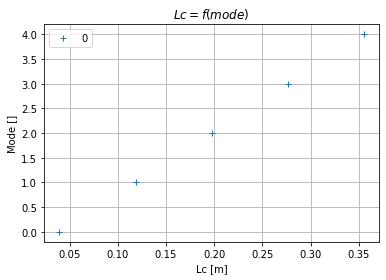

In [6]:
# data mesh & sumation solution
k = 5
l = 100

s = np.linspace(0, L, l)
N = np.array([i for i in range(k)])

v3  = np.zeros((l, k))
Lc3 = np.zeros((k))

# ----------------------------------

C = 1     # Displacement v within a constant

# ----------------------------------

## Displacement
plt.figure()

for n in N:
    w       = (n + 1/2) * np.pi / L
    v3[:,n] = (C / w) * (1 - np.cos(w*s))

plt.plot(v3, s)

plt.title('Diagramme de bifurcation')
plt.xlabel('v [m]')
plt.ylabel('s [m]')

plt.legend(N)
plt.grid(True)

# ----------------------------------

## Critical length
plt.figure()

for n in N:
    Lc3[n]  = (n + 1/2) * np.pi * np.sqrt(2 * Feq * Deq / (P * (3*Feq + 2*P)))

plt.plot(Lc3, N, '+')

plt.title(r'$Lc=f(mode)$')
plt.xlabel('Lc [m]')
plt.ylabel('Mode []')

plt.legend(N)
plt.grid(True)

# ----------------------------------

print(f'--> For a force (force at which we want to know buckling length) of {P:.2E} N we get critical length Lc = {Lc3[0]:.2E} m')

$\underline{\text{IV. Comparison}}$

0.435568186202592


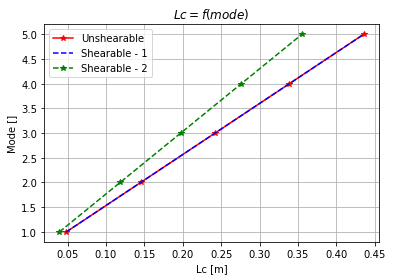

In [7]:
plt.figure()

plt.plot(Lc1, N+1, 'r-*', Lc2, N+1, 'b--', Lc3, N+1, 'g--*')

print(Lc1[-1])

plt.title(r'$Lc=f(mode)$')
plt.xlabel('Lc [m]')
plt.ylabel('Mode []')

plt.legend(['Unshearable', 'Shearable - 1', 'Shearable - 2'])
plt.grid(True)

$\Rightarrow$ **We take shear effect into account, at good magnitude. Then, the critical length is lower : we conclude that we've add a stress term, resulting into the beam suffering more stress and buckling faster, which makes sense.**